In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import scipy.stats as si
from numba import jit
plt.style.use('ggplot')

In [105]:
savefig = input("save figures? ")
if "no" in savefig or "n" in savefig:
    savefig = False
    print(" ### NOT SAVING FIGURES ### ")
else:
    savefig = True
    print(" ### SAVING FIGURES ### ")

save figures? y
 ### SAVING FIGURES ### 


In [3]:
plt.rcParams.update({'font.size': 12})
mpl.rcParams['text.usetex']=False

# Exploratory data work

In [4]:
bus = []  
for line in open("yelp_academic_dataset_business.json", 'r'):
    bus.append(json.loads(line))
bus = pd.DataFrame(bus) 

In [5]:
bus.isnull().values.any()

False

In [6]:
# Defining a function to retrieve all the unique entries within an array of arrays, and then returning as an ordered dict.   
def unique_entries(big_arr):
    result = []
    for arr in big_arr:
        for cat in arr:
            result.append(cat)
    [names, counts] = np.unique(result, return_counts = True)
    d = dict(zip(names, counts))
    d_sorted = dict(sorted(d.items(), key=lambda item:item[1]))
    return d_sorted

In [7]:
idx = []
for i in range(len(bus)):
    if 'Restaurants' in bus['categories'][i]:
        idx.append(i)
        
restaurants = bus[bus.index.isin(idx)]
restaurants.reset_index(drop=True, inplace=True)


In [8]:
restaurants["state"].value_counts()

AZ     9427
NV     5912
QC     3385
NC     2421
PA     1671
EDH    1232
WI     1172
BW      571
ON      372
IL      317
SC      143
MLN      75
RP       15
ELN       6
FIF       3
NM        1
          1
KHL       1
AK        1
NW        1
FL        1
TX        1
Name: state, dtype: int64

In [9]:
restaurant_cat = restaurants['categories']
r_arr = []

for arr in restaurant_cat:
    for cat in arr:
        r_arr.append(cat)


In [10]:
r_arr = np.array(r_arr)

In [11]:
[names, counts] = np.unique(r_arr, return_counts = True)

In [12]:
r_dict = dict(zip(names, counts))

In [13]:
r_dict = dict(sorted(r_dict.items(), key=lambda item: item[1]))

In [14]:
r_dict

{'Appliances': 1,
 'Austrian': 1,
 'Banks & Credit Unions': 1,
 'Bartenders': 1,
 'Beer Hall': 1,
 'Bikes': 1,
 'Boating': 1,
 'Cabaret': 1,
 'Car Wash': 1,
 'Colleges & Universities': 1,
 'Cosmetics & Beauty Supply': 1,
 'DJs': 1,
 'Day Spas': 1,
 'Department Stores': 1,
 'Dinner Theater': 1,
 'Donairs': 1,
 'Drive-Thru Bars': 1,
 'Dry Cleaning & Laundry': 1,
 'Eastern European': 1,
 'Ethnic Grocery': 1,
 'Fitness & Instruction': 1,
 'Flea Markets': 1,
 'Florists': 1,
 'Flowers & Gifts': 1,
 'Framing': 1,
 'Furniture Stores': 1,
 'Golf Equipment Shops': 1,
 'Guest Houses': 1,
 'Hardware Stores': 1,
 'Health & Medical': 1,
 'Hiking': 1,
 'Hong Kong Style Cafe': 1,
 'Kids Activities': 1,
 'Kitchen & Bath': 1,
 'Lakes': 1,
 'Landmarks & Historical Buildings': 1,
 'Local Services': 1,
 "Men's Clothing": 1,
 'Music & DVDs': 1,
 'Musicians': 1,
 'Nutritionists': 1,
 'Olive Oil': 1,
 'Oriental': 1,
 'Palatine': 1,
 'Pita': 1,
 'Public Services & Government': 1,
 'Recreation Centers': 1,
 'Rh

In [15]:
# Here we want to go through all of the states and check the count for the most popular type of restaurants.
output = {}
states = bus['state'].unique()
for state in states:
    state_df = bus[bus['state'] == state]
    state_df.reset_index(drop=True, inplace=True)
    idx = []
    for i in range(len(state_df)):
        cats = state_df['categories'][i]
        if 'Restaurants' in cat:
                idx.append(i)
    # Now collating all the rows which are restaurants. 
    restaurants = state_df[state_df.index.isin(idx)]
    restaurants.reset_index(drop=True)
    
    # Want to create a new dict with results for each state, ie a key should be an object with 5 keys. 
    categories_d = unique_entries(restaurants['categories'])
    d = {
        'Chinese': categories_d.get('Chinese'),
        'Mexican': categories_d.get('Mexican'),
        'Italian': categories_d.get('Italian')
    }
    print(state)
    print(d)

PA
{'Chinese': 106, 'Mexican': 81, 'Italian': 165}
NC
{'Chinese': 155, 'Mexican': 197, 'Italian': 136}
SC
{'Chinese': 11, 'Mexican': 11, 'Italian': 11}
WI
{'Chinese': 80, 'Mexican': 101, 'Italian': 62}
IL
{'Chinese': 27, 'Mexican': 38, 'Italian': 14}
AZ
{'Chinese': 576, 'Mexican': 1424, 'Italian': 680}
CA
{'Chinese': None, 'Mexican': None, 'Italian': None}
NV
{'Chinese': 424, 'Mexican': 737, 'Italian': 352}
FL
{'Chinese': None, 'Mexican': None, 'Italian': None}
NM
{'Chinese': None, 'Mexican': None, 'Italian': None}
QC
{'Chinese': 180, 'Mexican': 80, 'Italian': 279}
ON
{'Chinese': 45, 'Mexican': 10, 'Italian': 14}
TX
{'Chinese': None, 'Mexican': None, 'Italian': None}
EDH
{'Chinese': 78, 'Mexican': 20, 'Italian': 124}
MLN
{'Chinese': 3, 'Mexican': 2, 'Italian': 6}
HAM
{'Chinese': None, 'Mexican': None, 'Italian': None}
SCB
{'Chinese': None, 'Mexican': None, 'Italian': None}
ELN
{'Chinese': None, 'Mexican': None, 'Italian': 1}
FIF
{'Chinese': None, 'Mexican': None, 'Italian': None}
NTH
{

In [16]:
bus['state'].unique()

array(['PA', 'NC', 'SC', 'WI', 'IL', 'AZ', 'CA', 'NV', 'FL', 'NM', 'QC',
       'ON', 'TX', 'EDH', 'MLN', 'HAM', 'SCB', 'ELN', 'FIF', 'NTH', 'XGL',
       'BW', 'RP', 'KHL', 'MN', 'NW', 'TAM', 'AL', '', 'AK'], dtype=object)

In [17]:
az = bus[bus['state'] == 'AZ']
az.reset_index(drop=True, inplace=True)
for i in range(len(az)):
    if 'Chinese' in az['categories'][i]:
        if 'Mexican' in az['categories'][i]:  
            print(az['categories'][i])

['Szechuan', 'Asian Fusion', 'Mexican', 'Chinese', 'Restaurants']
['Mexican', 'Chinese', 'Restaurants']
['American (Traditional)', 'Mexican', 'Chinese', 'Restaurants']


## Arizona

In [18]:
def get_restaurants(df):
    '''Gets the rows which have restaurant in the array of categories and returns as df'''
    idx = []
    for i in range(len(df)):
        cat = df['categories'][i]
        if 'Restaurants' in cat:
            idx.append(i)
    restaurants = df[df.index.isin(idx)]
    restaurants.reset_index(drop=True, inplace=True)
    return restaurants 


In [19]:
az_restaurants = get_restaurants(az)

In [20]:
@jit(nopython=True)
def measure(lat1, lon1, lat2, lon2):  
    '''generally used geo measurement function'''
    R = 6378.137; # Radius of earth in KM
    dLat = lat2 * math.pi / 180 - lat1 * math.pi / 180;
    dLon = lon2 * math.pi / 180 - lon1 * math.pi / 180;
    a = math.sin(dLat/2) * math.sin(dLat/2) + math.cos(lat1 * math.pi / 180) * math.cos(lat2 * math.pi / 180) * math.sin(dLon/2) * math.sin(dLon/2);
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a));
    d = R * c;
    return d * 1000; # Returns in metres

In [21]:
def measure_matrix(df):
    N = len(df)
    lon = df['longitude']
    lat = df['latitude']
    distances = np.zeros((N,N))
    for i in range(N):
        for j in range(i+1, N):
            d = measure(lat[i], lon[i], lat[j], lon[j])
            distances[i,j] = d
            distances[j,i] = d
    return distances

In [22]:
phoenix_r = az_restaurants[az_restaurants['city'] == 'Phoenix']
phoenix_r.reset_index(drop=True, inplace=True)
phoenix_r_distances = measure_matrix(phoenix_r)
phoenix_r_distances = pd.DataFrame(phoenix_r_distances)
phoenix_r_distances = phoenix_r_distances.replace(0, np.nan)

### Distributions of distances to first nearby restaurant

In [23]:
phx_r_min_distances = phoenix_r_distances.min()

# Geopandas

In [24]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pyproj

C:\Users\Ubaid\miniconda3\envs\msc\lib\site-packages\geopandas\_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


### Phoenix

<AxesSubplot:>

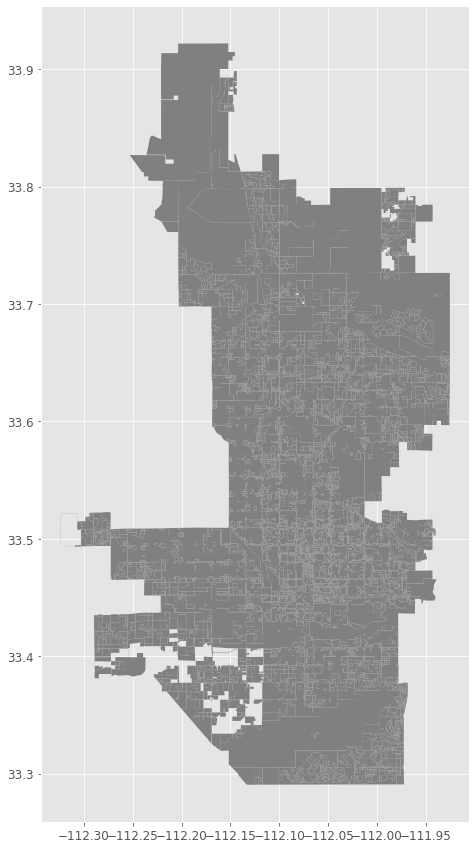

In [25]:
phoenix_map = gpd.read_file('/Users/Ubaid/Projects/msc/COMP0047 - Data Science/Arizona/Zoning.shp')
phoenix_map_geo = phoenix_map.to_crs(epsg=4326)
fig, ax = plt.subplots(figsize = (15,15))
phoenix_map_geo.plot(ax=ax, color = 'grey')

In [26]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip( phoenix_r['longitude'], phoenix_r['latitude'])]
geometry[:3]

In [27]:
#create function which assigns colors to whether they are clustered or indepedent
phoenix_r['min_distance'] = phx_r_min_distances
phoenix_r['class'] = phoenix_r.apply(lambda x: 'independent' if x['min_distance'] > 500 else 'clustered', axis=1)
phoenix_r['color'] = phoenix_r.apply(lambda x: 'cyan' if x['min_distance'] > 500 else 'indigo', axis = 1)
geo_df = gpd.GeoDataFrame(phoenix_r, crs=crs, geometry=geometry)

<ipython-input-27-043b5eeb0366>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phoenix_r['min_distance'] = phx_r_min_distances
<ipython-input-27-043b5eeb0366>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phoenix_r['class'] = phoenix_r.apply(lambda x: 'independent' if x['min_distance'] > 500 else 'clustered', axis=1)
<ipython-input-27-043b5eeb0366>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [28]:
az_city_colors = list(map(lambda x: np.where(az_restaurants['city'].unique() == x)[0][0],az_restaurants['city']))
az_city_colors = np.array(az_city_colors)

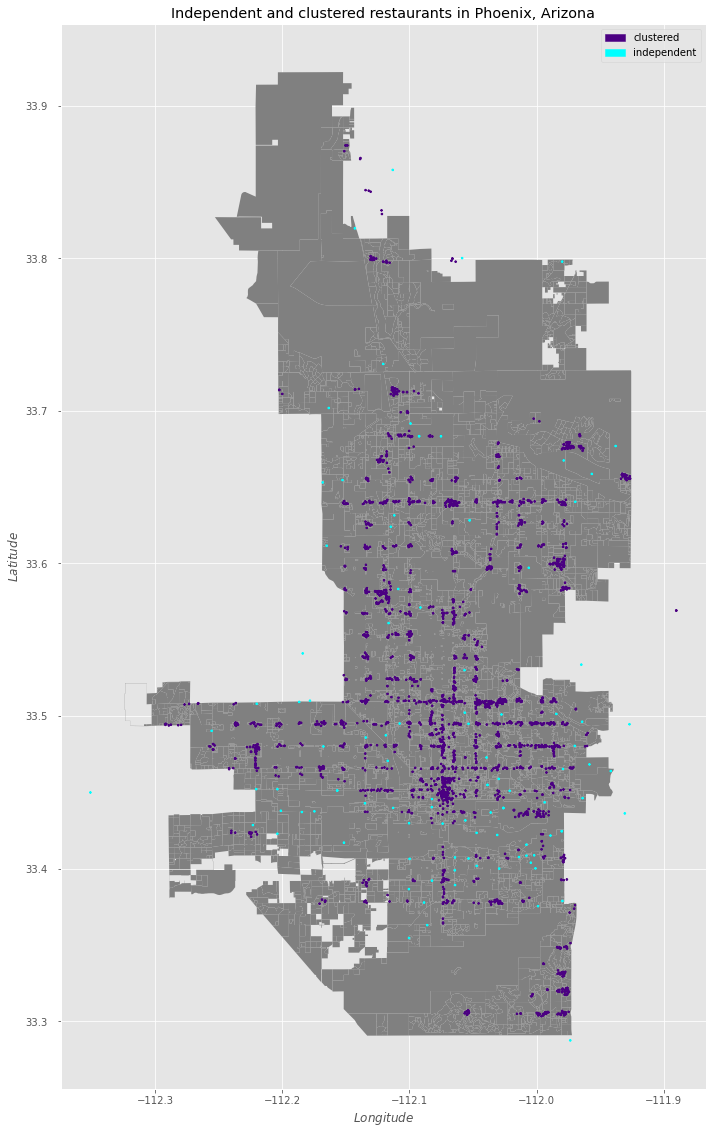

In [29]:
import matplotlib.patches as mpatches
%matplotlib inline
mpl.rcParams['ytick.major.pad']='10'
fig, ax = plt.subplots(figsize = (10,20))
phoenix_map_geo.plot(ax=ax, color='grey')
geo_df.plot(ax=ax, markersize = 3, marker = 'x', color=phoenix_r['color'])
plt.xlabel("$Longitude$")
plt.ylabel("$Latitude$")
plt.title("Independent and clustered restaurants in Phoenix, Arizona")
'''
plt.setp(ax.get_xticklabels(), rotation=90, va="top", ha="center")
plt.setp(ax.get_yticklabels(), rotation=270, va="center", ha="left")
ax.set_ylabel("Latitude", rotation=90)
ax.set_xlabel("Longitude", rotation=180)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

ax.text(-0.10,0.5,"Independent and clustered restaruants in Phoenix, Arizona", ha="center", va="center",
        transform=ax.transAxes, rotation=90)
'''
cyan_patch = mpatches.Patch(color='indigo', label='clustered')
indigo_patch = mpatches.Patch(color='cyan', label='independent')

plt.legend(handles=[cyan_patch, indigo_patch], loc='best')
plt.tight_layout()

if savefig: plt.savefig("phoenix.jpg")
plt.show()

In [30]:
az_r_distances = measure_matrix(az_restaurants)
az_r_distances = pd.DataFrame(az_r_distances)
az_r_distances.replace(0, np.nan, inplace=True)

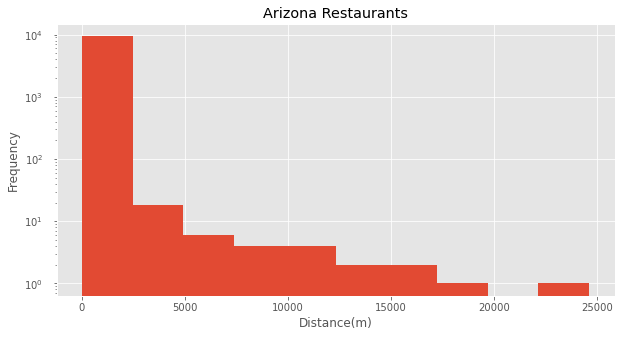

In [31]:
fig, ax = plt.subplots(figsize = (10,5))
ax.hist(az_r_distances.min())
ax.set_yscale('log')
ax.set_xlabel("Distance(m)")
ax.set_ylabel("Frequency")
ax.set_title("Arizona Restaurants")
if savefig: plt.savefig("Arizona_hist.jpg")

In [32]:
az_restaurants['min_distance'] = az_r_distances.min()
az_restaurants['class'] = az_restaurants.apply(lambda x: 'independent' if x['min_distance'] > 500 else 'clustered', axis=1)
az_restaurants['color'] = az_restaurants.apply(lambda x: 'orange' if x['min_distance'] > 500 else 'indigo', axis = 1)

<ipython-input-32-e20bcb7f5761>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  az_restaurants['min_distance'] = az_r_distances.min()
<ipython-input-32-e20bcb7f5761>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  az_restaurants['class'] = az_restaurants.apply(lambda x: 'independent' if x['min_distance'] > 500 else 'clustered', axis=1)
<ipython-input-32-e20bcb7f5761>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

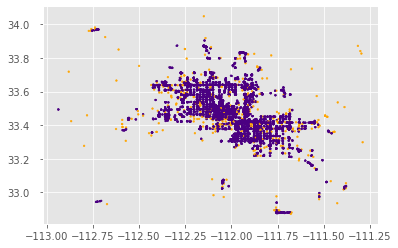

In [33]:
plt.scatter(az_restaurants['longitude'], az_restaurants['latitude'], c=az_restaurants['color'], s=3)

## Comparing distributions

Firstly for Arizona.

In [34]:
bins = np.sort(np.unique(az_restaurants["stars"].values))

In [35]:
az_ind = az_restaurants[az_restaurants['class'] == 'independent']
az_clust = az_restaurants[az_restaurants['class'] == 'clustered']

In [107]:
ind = az_ind
clust=az_clust
# moments
m_az_i = np.mean(ind["stars"].values)
v_az_i = np.var(ind["stars"].values)
std_dev_az_i = np.sqrt(v_az_i)
s_az_i = si.skew(ind["stars"].values)
k_az_i = si.kurtosis(ind["stars"].values)

# moments
m_az_c = np.mean(clust["stars"].values)
v_az_c = np.var(clust["stars"].values)
std_dev_az_c = np.sqrt(v_az_c)
s_az_c = si.skew(clust["stars"].values)
k_az_c = si.kurtosis(clust["stars"].values)

# Z-statistic
z_i = (m_az_i-m_az_c)/np.sqrt(std_dev_az_i + std_dev_az_c)

# Kolmogorov-Smirnov test for two samples
stat_i, pval_i = si.ks_2samp(ind["stars"].values, clust["stars"].values)
critical_i = 1.36*np.sqrt((ind["stars"].size + clust["stars"].size)/(ind["stars"].size * clust["stars"].size) )

# Anderson Darling test for two samples
ad_i, crit_vals, sig = si.anderson_ksamp([ind["stars"].values,clust["stars"].values])

<ipython-input-107-f002df57c532>:25: UserWarning: p-value floored: true value smaller than 0.001
  ad_i, crit_vals, sig = si.anderson_ksamp([ind["stars"].values,clust["stars"].values])


In [108]:
# save results
print("### Arizona Independent Rsetaurants ###")
print("### Moments ###")
print("Mean:      {0:.3f}".format(m_az_i))
print("Variance:  {0:.3f}".format(v_az_i))
print("Std Dev:   {0:.3f}".format(std_dev_az_i))
print("Skewness:  {0:.3f}".format(s_az_i))
print("Kurtosis:  {0:.3f}\n".format(k_az_i))
print("### Arizona Clustered Restaurants ###")
print("### Moments ###")
print("Mean:      {0:.3f}".format(m_az_c))
print("Variance:  {0:.3f}".format(v_az_c))
print("Std Dev:   {0:.3f}".format(std_dev_az_c))
print("Skewness:  {0:.3f}".format(s_az_c))
print("Kurtosis:  {0:.3f}\n".format(k_az_c))
print("### Comparision ###")
print("Z-test:   {:.3f}".format(z_i))
print("### Anderson Darling ###")
print("AD statistic: {:.3f}".format(ad_i))
print("AD critical values: {}".format(crit_vals))
print("K-S, statistic: {:.3f}".format(stat_i))
print("K-S, p-value:   {:.3f}".format(pval_i))
print("Critical value: {:.3f}".format(critical_i))
if stat_i < critical_i:
    print("Do not reject the null hypothesis")
else:
    print("Reject the null hypothesis")

### Arizona Independent Rsetaurants ###
### Moments ###
Mean:      3.514
Variance:  0.759
Std Dev:   0.871
Skewness:  -0.377
Kurtosis:  -0.425

### Arizona Clustered Restaurants ###
### Moments ###
Mean:      3.404
Variance:  0.580
Std Dev:   0.762
Skewness:  -0.497
Kurtosis:  -0.017

### Comparision ###
Z-test:   0.086
### Anderson Darling ###
AD statistic: 14.540
AD critical values: [0.325 1.226 1.961 2.718 3.752 4.592 6.546]
K-S, statistic: 0.098
K-S, p-value:   0.002
Critical value: 0.073
Reject the null hypothesis


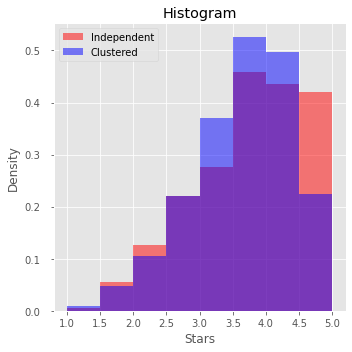

In [109]:
fig = plt.figure(figsize=(5,5))
plt.hist(ind["stars"],bins=bins,alpha=0.5,density=True,color="r")
plt.hist(clust["stars"],bins=bins,alpha=0.5,density=True,color="b")
# plt.yscale("log")
plt.title("Histogram")
plt.xlabel("Stars")
plt.ylabel("Density")
plt.tight_layout()
plt.legend(["Independent","Clustered"],loc="best")
if savefig: plt.savefig("phx_histogram.jpg")
plt.show()

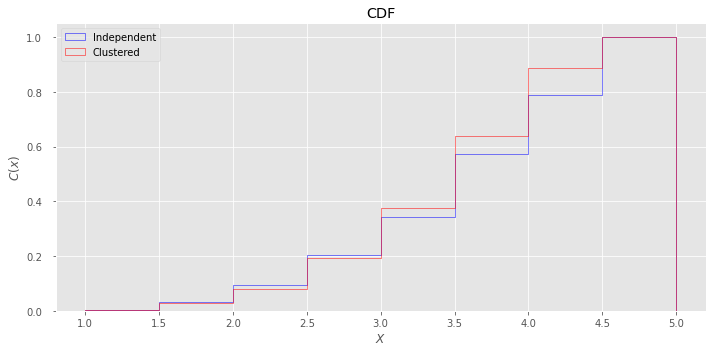

In [110]:
fig, ax = plt.subplots(figsize=(10, 5))

# plot the cumulative histogram
n, bins, patches = ax.hist(ind["stars"], bins=bins, density=True, histtype='step',
                           cumulative=True, label='Empirical',color='b')
n_2, bins_2, _ = ax.hist(clust["stars"], bins=bins, density=True, histtype='step',
                           cumulative=True, label='Empirical',color='r')
# Add a line showing the expected distribution.
#y = ((1 / (np.sqrt(2 * np.pi) * std_dev_p)) *
#np.exp(-0.5 * (1 / std_dev_p * (bins - m_p))**2))
#y = y.cumsum()
#y /= y[-1]
# ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical',color='g')
ax.legend(["Independent", "Clustered"], loc="upper left")
plt.title("CDF")
plt.xlabel("$X$")
plt.ylabel("$C(x)$")
plt.tight_layout()
if savefig: plt.savefig("phx_cdf.jpg")
plt.show()

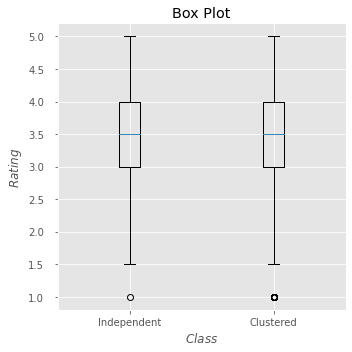

In [40]:
fig, ax1 = plt.subplots(figsize=(5,5))
data = [ind["stars"], clust["stars"]]
# plt.boxplot(penn["stars"])
plt.boxplot(data)
plt.title("Box Plot")
ax1.set_xticklabels(["Independent","Clustered"])
plt.xlabel("$Class$")
plt.ylabel("$Rating$")
plt.tight_layout()
if savefig: plt.savefig("phx_boxplot.jpg")
plt.show()

# Mexican and Chinese 

We want to compare the distribution of indepedent and clustered for each of the 2 cuisines in the all the data available.  We choose this state in particular because it has the most data entries for the 2 types of cuisine above.  We allow this since we see that there is only one state with one restaurant of either Mexican and Chinese and therefore since we are using minimum distances for our clustering, not paying any attention to relative geographical locations from state to state is not an issue

In [41]:
restaurants = get_restaurants(bus)
idx = []
for i in range(len(restaurants)):
    state = restaurants['state'][i]
    city = restaurants['city'][i]
    if state == 'AZ' and city == "Phoenix":
        idx.append(i)
    elif state == "PA" and city == "Pittsburgh":
        idx.append(i)
    elif state == "WI" and city == "Madison":
        idx.append(i)
    elif state == "NC" and city == "Charlotte":
        idx.append(i)
    elif state == "IL" and city == "Champaign-Urbana":
        idx.append(i)
    elif state == "NV" and city == "Las Vegas":
        idx.append(i)
    elif state == "QC" and city == "Montreal":
        idx.append(i)
    elif state == "ON":
        if city == "Waterloo" or city == "Hamilton":
            idx.append(i)
    elif state == "EDH":
        idx.append(i)
main_metro_r = restaurants[restaurants.index.isin(idx)]
main_metro_r.reset_index(drop=True, inplace=True)

In [42]:
len(main_metro_r)

13820

In [43]:
j = 0
for i in range(len(main_metro_r)):
    if 'Mexican' in main_metro_r['categories'][i]:
        j = j + 1
print(j)

1495


In [44]:
# Here we are testing to see if there's any difference when we select the main metropolitan areas
main_metro_r_dist = pd.DataFrame(measure_matrix(main_metro_r))
main_metro_r_dist.reset_index(drop=True, inplace=True)
main_metro_r_dist.replace(0, np.nan, inplace=True)
bus = main_metro_r

In [45]:
def get_restaurants_cuisine(cuisine, df):
    N = len(df)
    idx = []
    for i in range(N):
        cats = df['categories'][i]
        if 'Restaurants' in cats:
            if cuisine in cats:
                idx.append(i)
                    
    restaurants = df[df.index.isin(idx)]
    restaurants.reset_index(drop=True, inplace=True)
    return restaurants[restaurants['state'] != 'ELN']

In [46]:
mexican_r = get_restaurants_cuisine('Mexican', bus)
italian_r = get_restaurants_cuisine('Italian', bus)
chinese_r = get_restaurants_cuisine('Chinese', bus)

In [47]:
mexican_r_dist = pd.DataFrame(measure_matrix(mexican_r))
mexican_r_dist.reset_index(drop=True, inplace=True)
mexican_r_dist.replace(0, np.nan, inplace=True)

In [48]:
chinese_r_dist = pd.DataFrame(measure_matrix(chinese_r))
chinese_r_dist.reset_index(drop=True, inplace=True)
chinese_r_dist.replace(0, np.nan, inplace=True)

In [69]:
def add_class(df, distances):
    df['min_distance'] = distances.min()
    df['class'] = df.apply(lambda x: 'independent' if x['min_distance'] > 500 else 'clustered', axis=1)
    df['color'] = df.apply(lambda x: 'cyan' if x['min_distance'] > 500 else 'indigo', axis = 1)
    return df

In [70]:
mexican_r = add_class(mexican_r,mexican_r_dist)
chinese_r = add_class(chinese_r, chinese_r_dist)

In [71]:
mexican_r_i = mexican_r[mexican_r['class'] == 'independent']
mexican_r_c = mexican_r[mexican_r['class'] == 'clustered']
chinese_r_i = chinese_r[chinese_r['class'] == 'independent']
chinese_r_c = chinese_r[chinese_r['class'] == 'clustered']

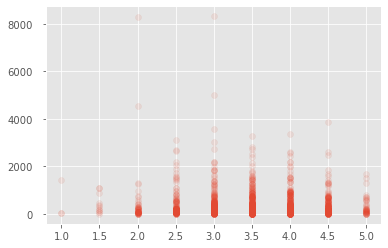

In [72]:
plt.scatter(mexican_r["stars"].values, mexican_r_dist.min(), alpha=.1)

In [73]:
bins=np.sort(np.unique(mexican_r_i["stars"].values))

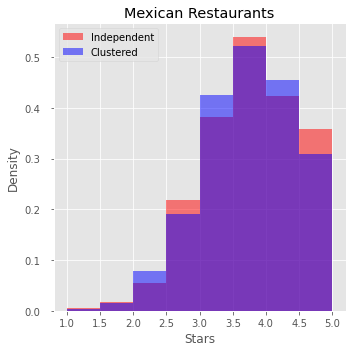

In [74]:
fig = plt.figure(figsize=(5,5))
plt.hist(mexican_r_i["stars"],bins=bins,alpha=0.5,density=True,color="r")
plt.hist(mexican_r_c["stars"],bins=bins,alpha=0.5,density=True,color="b")
# plt.yscale("log")
plt.title("Mexican Restaurants")
plt.xlabel("Stars")
plt.ylabel("Density")
plt.tight_layout()
plt.legend(["Independent","Clustered"],loc="best")
if savefig: plt.savefig("mx_histogram.jpg")
plt.show()

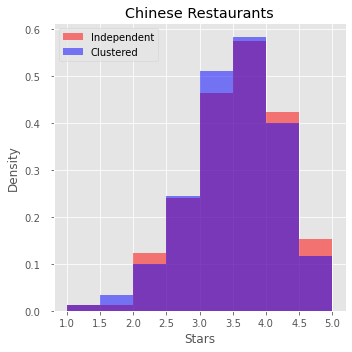

In [75]:
fig = plt.figure(figsize=(5,5))
plt.hist(chinese_r_i["stars"],bins=bins,alpha=0.5,density=True,color="r")
plt.hist(chinese_r_c["stars"],bins=bins,alpha=0.5,density=True,color="b")
# plt.yscale("log")
plt.title("Chinese Restaurants")
plt.xlabel("Stars")
plt.ylabel("Density")
plt.tight_layout()
plt.legend(["Independent","Clustered"],loc="best")
if savefig: plt.savefig("chi_histogram.jpg")
plt.show()

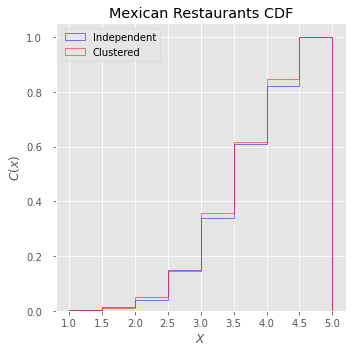

In [76]:
fig, ax = plt.subplots(figsize=(5, 5))

# plot the cumulative histogram
n, bins, patches = ax.hist(mexican_r_i["stars"], bins=bins, density=True, histtype='step',
                           cumulative=True, label='Empirical',color='b')
n_2, bins_2, _ = ax.hist(mexican_r_c["stars"], bins=bins, density=True, histtype='step',
                           cumulative=True, label='Empirical',color='r')
# Add a line showing the expected distribution.
#y = ((1 / (np.sqrt(2 * np.pi) * std_dev_p)) *
#np.exp(-0.5 * (1 / std_dev_p * (bins - m_p))**2))
#y = y.cumsum()
#y /= y[-1]
# ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical',color='g')
ax.legend(["Independent", "Clustered"], loc="upper left")
plt.title("Mexican Restaurants CDF")
plt.xlabel("$X$")
plt.ylabel("$C(x)$")
plt.tight_layout()
if savefig: plt.savefig("mx_cdf.jpg")
plt.show()

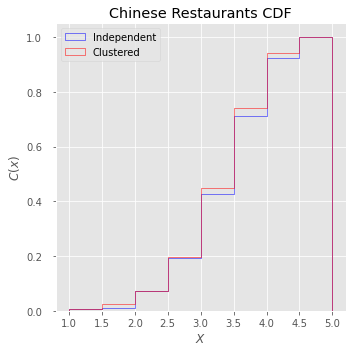

In [77]:
fig, ax = plt.subplots(figsize=(5, 5))

# plot the cumulative histogram
n, bins, patches = ax.hist(chinese_r_i["stars"], bins=bins, density=True, histtype='step',
                           cumulative=True, label='Empirical',color='b')
n_2, bins_2, _ = ax.hist(chinese_r_c["stars"], bins=bins, density=True, histtype='step',
                           cumulative=True, label='Empirical',color='r')
# Add a line showing the expected distribution.
#y = ((1 / (np.sqrt(2 * np.pi) * std_dev_p)) *
#np.exp(-0.5 * (1 / std_dev_p * (bins - m_p))**2))
#y = y.cumsum()
#y /= y[-1]
# ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical',color='g')
ax.legend(["Independent", "Clustered"], loc="upper left")
plt.title("Chinese Restaurants CDF")
plt.xlabel("$X$")
plt.ylabel("$C(x)$")
plt.tight_layout()
if savefig: plt.savefig("chi_cdf.jpg")
plt.show()

In [78]:
ind = mexican_r_i
clust=mexican_r_c
# moments
m_mx_i = np.mean(ind["stars"].values)
v_mx_i = np.var(ind["stars"].values)
std_dev_mx_i = np.sqrt(v_mx_i)
s_mx_i = si.skew(ind["stars"].values)
k_mx_i = si.kurtosis(ind["stars"].values)

# moments
m_mx_c = np.mean(clust["stars"].values)
v_mx_c = np.var(clust["stars"].values)
std_dev_mx_c = np.sqrt(v_mx_c)
s_mx_c = si.skew(clust["stars"].values)
k_mx_c = si.kurtosis(clust["stars"].values)

# Z-statistic
z_i = (m_mx_i-m_mx_c)/np.sqrt(std_dev_mx_i + std_dev_mx_c)

# Kolmogorov-Smirnov test for two samples
stat_i, pval_i = si.ks_2samp(ind["stars"].values, clust["stars"].values)
critical_i = 1.36*np.sqrt((ind["stars"].size + clust["stars"].size)/(ind["stars"].size * clust["stars"].size) )

# Anderson Darling test for two samples
ad_i, crit_vals, sig = si.anderson_ksamp([ind["stars"].values,clust["stars"].values])

# save results
print("### Mexican Independent Restaurants ###")
print("### Moments ###")
print("Mean:      {0:.3f}".format(m_mx_i))
print("Variance:  {0:.3f}".format(v_mx_i))
print("Std Dev:   {0:.3f}".format(std_dev_mx_i))
print("Skewness:  {0:.3f}".format(s_mx_i))
print("Kurtosis:  {0:.3f}\n".format(k_mx_i))
print("### Mexican Clustered Restaurants ###")
print("### Moments ###")
print("Mean:      {0:.3f}".format(m_mx_c))
print("Variance:  {0:.3f}".format(v_mx_c))
print("Std Dev:   {0:.3f}".format(std_dev_mx_c))
print("Skewness:  {0:.3f}".format(s_mx_c))
print("Kurtosis:  {0:.3f}\n".format(k_mx_c))
print("### Comparision ###")
print("Z-test:   {:.3f}".format(z_i))
print("### Anderson Darling ###")
print("AD statistic: {:.3f}".format(ad_i))
print("AD critical values: {}".format(crit_vals))
print("K-S, statistic: {:.3f}".format(stat_i))
print("K-S, p-value:   {:.3f}".format(pval_i))
print("Critical value: {:.3f}".format(critical_i))
if stat_i < critical_i:
    print("Do not reject the null hypothesis")
else:
    print("Reject the null hypothesis")

### Mexican Independent Restaurants ###
### Moments ###
Mean:      3.530
Variance:  0.546
Std Dev:   0.739
Skewness:  -0.273
Kurtosis:  -0.113

### Mexican Clustered Restaurants ###
### Moments ###
Mean:      3.502
Variance:  0.526
Std Dev:   0.725
Skewness:  -0.253
Kurtosis:  -0.165

### Comparision ###
Z-test:   0.024
### Anderson Darling ###
AD statistic: -0.857
AD critical values: [0.325 1.226 1.961 2.718 3.752 4.592 6.546]
K-S, statistic: 0.024
K-S, p-value:   0.997
Critical value: 0.085
Do not reject the null hypothesis


<ipython-input-78-f9bcdf7e9db7>:25: UserWarning: p-value capped: true value larger than 0.25
  ad_i, crit_vals, sig = si.anderson_ksamp([ind["stars"].values,clust["stars"].values])


In [79]:
ind = chinese_r_i
clust=chinese_r_c
# moments
m_ch_i = np.mean(ind["stars"].values)
v_ch_i = np.var(ind["stars"].values)
std_dev_ch_i = np.sqrt(v_ch_i)
s_ch_i = si.skew(ind["stars"].values)
k_ch_i = si.kurtosis(ind["stars"].values)

# moments
m_ch_c = np.mean(clust["stars"].values)
v_ch_c = np.var(clust["stars"].values)
std_dev_ch_c = np.sqrt(v_ch_c)
s_ch_c = si.skew(clust["stars"].values)
k_ch_c = si.kurtosis(clust["stars"].values)

# Z-statistic
z_i = (m_ch_i-m_ch_c)/np.sqrt(std_dev_ch_i + std_dev_ch_c)

# Kolmogorov-Smirnov test for two samples
stat_i, pval_i = si.ks_2samp(ind["stars"].values, clust["stars"].values)
critical_i = 1.36*np.sqrt((ind["stars"].size + clust["stars"].size)/(ind["stars"].size * clust["stars"].size) )

# Anderson Darling test for two samples
ad_i, crit_vals, sig = si.anderson_ksamp([ind["stars"].values,clust["stars"].values])

# save results
print("### Chinese Independent Restaurants ###")
print("### Moments ###")
print("Mean:      {0:.3f}".format(m_ch_i))
print("Variance:  {0:.3f}".format(v_ch_i))
print("Std Dev:   {0:.3f}".format(std_dev_ch_i))
print("Skewness:  {0:.3f}".format(s_ch_i))
print("Kurtosis:  {0:.3f}\n".format(k_ch_i))
print("### Chinese Clustered Restaurants ###")
print("### Moments ###")
print("Mean:      {0:.3f}".format(m_ch_c))
print("Variance:  {0:.3f}".format(v_ch_c))
print("Std Dev:   {0:.3f}".format(std_dev_ch_c))
print("Skewness:  {0:.3f}".format(s_ch_c))
print("Kurtosis:  {0:.3f}\n".format(k_ch_c))
print("### Comparision ###")
print("Z-test:   {:.3f}".format(z_i))
print("### Anderson Darling ###")
print("AD statistic: {:.3f}".format(ad_i))
print("AD critical values: {}".format(crit_vals))
print("K-S, statistic: {:.3f}".format(stat_i))
print("K-S, p-value:   {:.3f}".format(pval_i))
print("Critical value: {:.3f}".format(critical_i))
if stat_i < critical_i:
    print("Do not reject the null hypothesis")
else:
    print("Reject the null hypothesis")

### Chinese Independent Restaurants ###
### Moments ###
Mean:      3.330
Variance:  0.484
Std Dev:   0.696
Skewness:  -0.377
Kurtosis:  0.033

### Chinese Clustered Restaurants ###
### Moments ###
Mean:      3.289
Variance:  0.482
Std Dev:   0.694
Skewness:  -0.410
Kurtosis:  0.355

### Comparision ###
Z-test:   0.035
### Anderson Darling ###
AD statistic: -0.427
AD critical values: [0.325 1.226 1.961 2.718 3.752 4.592 6.546]
K-S, statistic: 0.029
K-S, p-value:   0.989
Critical value: 0.092
Do not reject the null hypothesis


<ipython-input-79-aaad4629f758>:25: UserWarning: p-value capped: true value larger than 0.25
  ad_i, crit_vals, sig = si.anderson_ksamp([ind["stars"].values,clust["stars"].values])


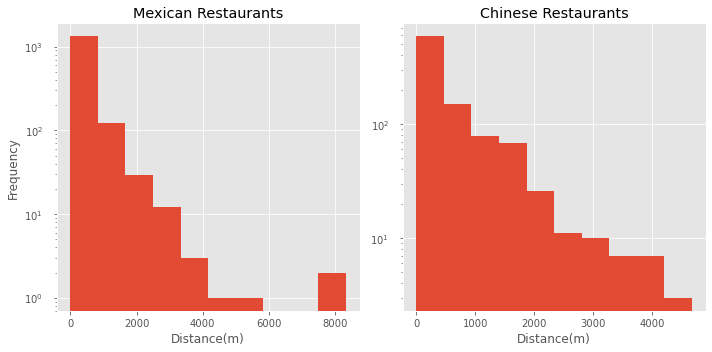

In [80]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].hist(mexican_r_dist.min())
ax[1].hist(chinese_r_dist.min())
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_xlabel("Distance(m)")
ax[1].set_xlabel("Distance(m)")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Mexican Restaurants")
ax[1].set_title("Chinese Restaurants")
plt.tight_layout()
if savefig: plt.savefig("mx_ch_histogram.jpg")
plt.show()

In [81]:
def threshold_check(distances, threshold):
    ind = sum(distances.min() > threshold)
    clust = sum(distances.min() <= threshold)
    print("### Threshold Value: {} ### \n".format(threshold))
    print("Number of Independent Restaurants: {}".format(ind))
    print("Number of Clustered Restaurants {}".format(clust))
    print("Proportion of Independent: {:.3f} \n".format(ind/(ind+clust)))

In [82]:
print("##### Mexican Restaurants ##### \n")
for thresh in [500,600,700,800,900,1000]:
    threshold_check(mexican_r_dist, thresh)

##### Mexican Restaurants ##### 

### Threshold Value: 500 ### 

Number of Independent Restaurants: 330
Number of Clustered Restaurants 1165
Proportion of Independent: 0.221 

### Threshold Value: 600 ### 

Number of Independent Restaurants: 270
Number of Clustered Restaurants 1225
Proportion of Independent: 0.181 

### Threshold Value: 700 ### 

Number of Independent Restaurants: 230
Number of Clustered Restaurants 1265
Proportion of Independent: 0.154 

### Threshold Value: 800 ### 

Number of Independent Restaurants: 179
Number of Clustered Restaurants 1316
Proportion of Independent: 0.120 

### Threshold Value: 900 ### 

Number of Independent Restaurants: 149
Number of Clustered Restaurants 1346
Proportion of Independent: 0.100 

### Threshold Value: 1000 ### 

Number of Independent Restaurants: 127
Number of Clustered Restaurants 1368
Proportion of Independent: 0.085 



In [83]:
print("##### Chinese Restaurants ##### \n")
for thresh in [500,600,700,800,900,1000]:
    threshold_check(chinese_r_dist, thresh)

##### Chinese Restaurants ##### 

### Threshold Value: 500 ### 

Number of Independent Restaurants: 341
Number of Clustered Restaurants 604
Proportion of Independent: 0.361 

### Threshold Value: 600 ### 

Number of Independent Restaurants: 305
Number of Clustered Restaurants 640
Proportion of Independent: 0.323 

### Threshold Value: 700 ### 

Number of Independent Restaurants: 277
Number of Clustered Restaurants 668
Proportion of Independent: 0.293 

### Threshold Value: 800 ### 

Number of Independent Restaurants: 253
Number of Clustered Restaurants 692
Proportion of Independent: 0.268 

### Threshold Value: 900 ### 

Number of Independent Restaurants: 221
Number of Clustered Restaurants 724
Proportion of Independent: 0.234 

### Threshold Value: 1000 ### 

Number of Independent Restaurants: 192
Number of Clustered Restaurants 753
Proportion of Independent: 0.203 



In [84]:
print("##### Restaurants in Phoenix ##### \n")
for thresh in [500,600,700,800,900,1000]:
    threshold_check(az_r_distances, thresh)

##### Restaurants in Phoenix ##### 

### Threshold Value: 500 ### 

Number of Independent Restaurants: 362
Number of Clustered Restaurants 9065
Proportion of Independent: 0.038 

### Threshold Value: 600 ### 

Number of Independent Restaurants: 299
Number of Clustered Restaurants 9128
Proportion of Independent: 0.032 

### Threshold Value: 700 ### 

Number of Independent Restaurants: 254
Number of Clustered Restaurants 9173
Proportion of Independent: 0.027 

### Threshold Value: 800 ### 

Number of Independent Restaurants: 212
Number of Clustered Restaurants 9215
Proportion of Independent: 0.022 

### Threshold Value: 900 ### 

Number of Independent Restaurants: 184
Number of Clustered Restaurants 9243
Proportion of Independent: 0.020 

### Threshold Value: 1000 ### 

Number of Independent Restaurants: 156
Number of Clustered Restaurants 9271
Proportion of Independent: 0.017 



# Correlation

## Kendall's Tau 

In [104]:
tau_mex, p_mex = si.kendalltau(mexican_r["stars"].values, mexican_r_dist.min())
tau_chi, p_chi = si.kendalltau(chinese_r["stars"].values, chinese_r_dist.min())
tau_az, p_az = si.kendalltau(az_restaurants["stars"].values, az_r_distances.min())

# Print Results

print("### Kendall's Tau ###")
print("Mexican Restaurants Kendall's Tau: {:.3f}".format(tau_mex))
print("Mexican Restaurants p-value: {:.3f}".format(p_mex))
print("Chinese Restaurants Kendall's Tau: {:.3f}".format(tau_chi))
print("Chinese Restaurants p-value: {:.3f}".format(p_chi))
print("Arizona Restaurants Kendall's Tau: {:.3f}".format(tau_az))
print("Arizona Restaurants p-value: {:.3f}".format(p_az))

### Kendall's Tau ###
Mexican Restaurants Kendall's Tau: -0.012
Mexican Restaurants p-value: 0.513
Chinese Restaurants Kendall's Tau: 0.016
Chinese Restaurants p-value: 0.514
Arizona Restaurants Kendall's Tau: -0.045
Arizona Restaurants p-value: 0.000


## Spearmans Rank Coefficient 

In [86]:
sp_mex, p_mex = si.spearmanr(mexican_r["stars"].values, mexican_r_dist.min())
sp_chi, p_chi = si.spearmanr(chinese_r["stars"].values, chinese_r_dist.min())
sp_az, p_az = si.spearmanr(az_restaurants["stars"].values, az_r_distances.min())

print("### Spearman's Rank ###")
print("Mexican Restaurants Spearman's Rank: {:.3f}".format(sp_mex))
print("Mexican Restaurants p-value: {:.3f}".format(p_mex))
print("Chinese Restaurants Spearman's Rank: {:.3f}".format(sp_chi))
print("Chinese Restaurants p-value: {:.3f}".format(p_chi))
print("Arizona Restaurants Spearman's Rank: {:.3f}".format(sp_az))
print("Arizona Restaurants p-value: {:.3f}".format(p_az))

### Spearman's Rank ###
Mexican Restaurants Spearman's Rank: -0.018
Mexican Restaurants p-value: 0.495
Chinese Restaurants Spearman's Rank: 0.021
Chinese Restaurants p-value: 0.515
Arizona Restaurants Spearman's Rank: -0.062
Arizona Restaurants p-value: 0.000


## Plots

In [87]:
def correlation_plot(df, distances, title, file):
    fig, ax = plt.subplots(figsize = (10,5))
    plt.scatter(df["stars"].values, distances.min(), alpha=0.2)
    ax.set_xlabel("Stars")
    ax.set_ylabel("Distance(m)")
    ax.set_title(title)
    if savefig: plt.savefig("{}_corr.jpg".format(file))
    plt.show()

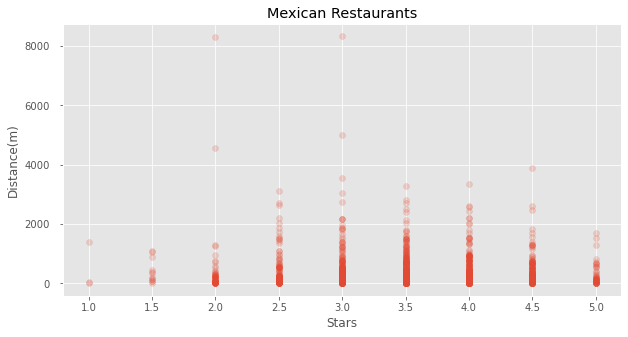

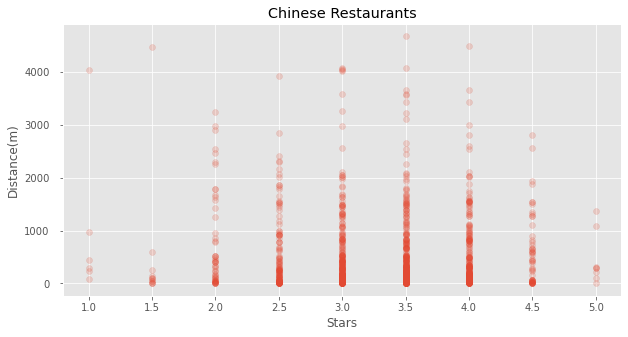

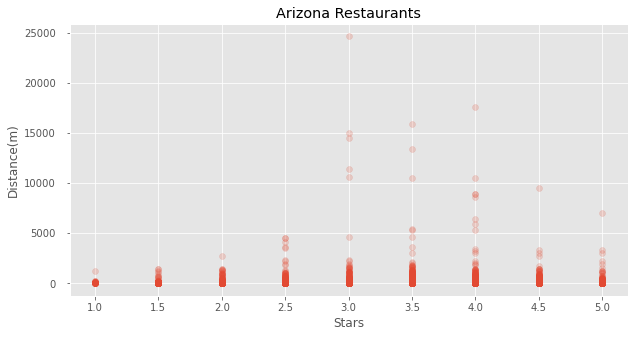

In [88]:
correlation_plot(mexican_r, mexican_r_dist, "Mexican Restaurants", "mx")
correlation_plot(chinese_r, chinese_r_dist, "Chinese Restaurants", "ch")
correlation_plot(az_restaurants, az_r_distances, "Arizona Restaurants", "az")

In [92]:
az_restaurants["stars"].value_counts()

3.5    2466
4.0    2331
3.0    1729
2.5    1042
4.5     935
2.0     503
1.5     222
5.0     159
1.0      40
Name: stars, dtype: int64

In [103]:
sum(az_ind["stars"] == 5)/len(az_ind)

0.06353591160220995

In [102]:
sum(az_clust["stars"] == 5)/len(az_clust)

0.015002757859900717